# Deploy the model over the web using Gradio

### Desktop Web Browser:
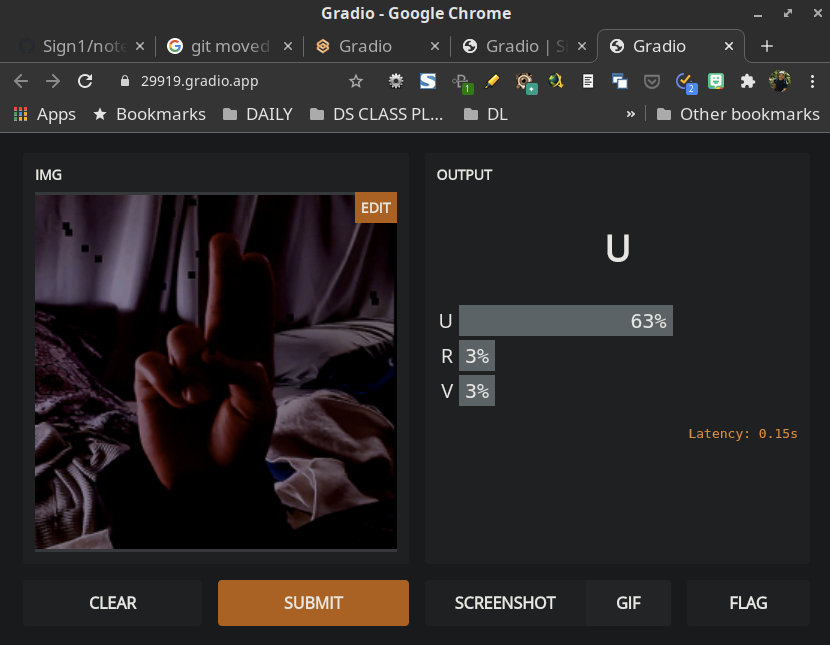

<br>

### Cel Phone:
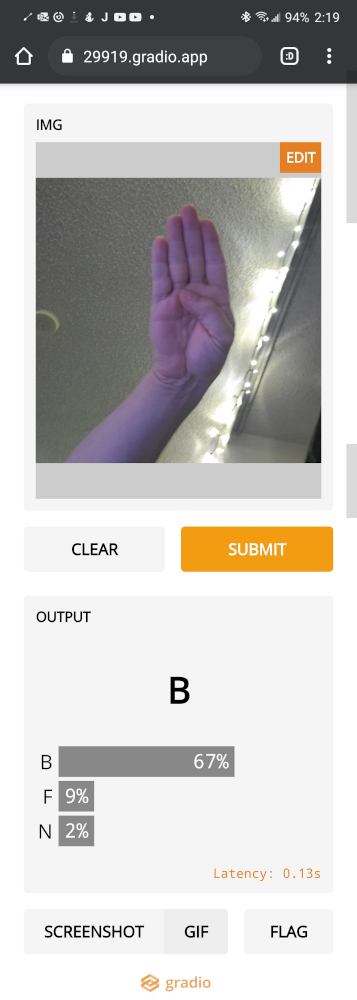

<br>
<br>

In [1]:
import sys
sys.path.append('../utils')

In [2]:
import warnings
warnings.filterwarnings('ignore')  # or 'once'  

In [3]:
import pyforest
import gradio as gr

from datetime import datetime
from fastbook import *
from fastai.vision.all import *
from fastai.vision.widgets import *
import fastai
import gc
from nn_utils_eff import *
from augmentation import *

In [4]:
RUN_NAME = '20210323-1337 - arch=tf_efficientnet_b4_ns - samples=7500 frozen=1 epochs=10 bs=48 res=380 _data=combined4_with_overflow_all_d'
# RUN_NAME = '20210310-1527 - arch=tf_efficientnet_b4_ns - samples=-1 frozen=1 epochs=3 bs=48 res=380 _data=combined4_with_overflow'

learn_inf = load_learner(f'{RUN_NAME}.pkl', cpu=True)
#     load_model(f'models/{RUN_NAME}.pth', learn_inf, with_opt=False, opt=Adam)
remove_cbs(learn_inf)
print('Model Loaded.')

Model Loaded.


In [5]:
learn_inf.remove_cbs([NonNativeMixedPrecision, ModelToHalf])
learn_inf.cbs

(#4) [TrainEvalCallback,Recorder,ProgressCallback,GradientClip]

In [6]:
labels = [char for char in ascii_uppercase]
labels.remove('J')
labels.remove('Z')


In [7]:
def get_sign(img):
    pred,pred_idx,probs = learn_inf.predict(img)
    return {labels[i]: float(probs[i]) for i in range(len(labels))}
#     return f'Predict: {pred}, Conf: {probs[pred_idx]:.02f}
    
    
image = gr.inputs.Image(shape=(380,380))
label = gr.outputs.Label(num_top_classes=3)
iface = gr.Interface(fn=get_sign, inputs=image, outputs=label)
iface.launch(share=True)

Running locally at: http://127.0.0.1:7860/
This share link will expire in 24 hours. If you need a permanent link, visit: https://gradio.app/introducing-hosted (NEW!)
Running on External URL: https://45132.gradio.app
Interface loading below...


(<Flask 'gradio.networking'>,
 'http://127.0.0.1:7860/',
 'https://45132.gradio.app')